In [2]:
from qiskit import QuantumCircuit
from qiskit.primitives import BackendSamplerV2
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel 
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

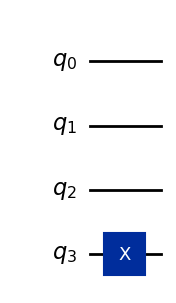

In [3]:
oracle = QuantumCircuit(4)
ORACLE = 1
if ORACLE == 0:
    #Oracle 1
    oracle.x([0,1,2])
    oracle.cx([0,1,2],[3,3,3])
    oracle.x([0,1,2])
else :
    #Oracle 2
    oracle.x(3)
display(oracle.draw("mpl"))

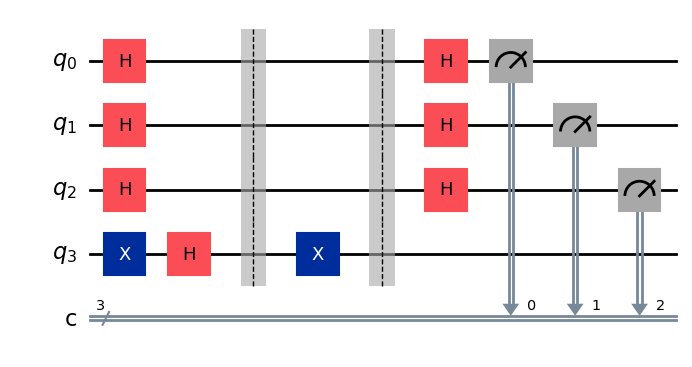

In [4]:
qc_dj = QuantumCircuit(4, 3)
qc_dj.x(3)
qc_dj.h(range(4))
qc_dj.barrier()
qc_dj.compose(oracle, inplace=True)
qc_dj.barrier()
qc_dj.h(range(3))
qc_dj.measure(range(3), range(3))
# qc_dj.decompose().decompose()
display(qc_dj.draw("mpl"))

In [5]:
noise_model = NoiseModel()
backend_sim = AerSimulator()
sampler_sim = BackendSamplerV2(backend=backend_sim)

target = backend_sim.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)
 
qc_isa = pm.run(qc_dj)
job = sampler_sim.run([qc_isa],shots=1)

In [6]:
res = job.result()
counts = res[0].data.c.get_counts()

if (
    "0" * 3 in counts
):
    print("constant")
else:
    print("balanced")

constant
